# Klasifikasi Obesitas

## Setup the notebook

In [23]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
print("Setup Complete")

Setup Complete


Import library yang dibutuhkan:

1.  Memuat library Pandas, yang digunakan untuk manipulasi dan analisis data dalam format tabel (DataFrame).
    1. pd.plotting.register_matplotlib_converters(): Mendaftarkan konverter yang diperlukan untuk memastikan kompatibilitas antara tipe data Pandas dan Matplotlib saat membuat visualisasi.
    2. import matplotlib.pyplot as plt: Memuat library Matplotlib untuk membuat berbagai macam visualisasi data, seperti plot garis, scatter plot, histogram, dan sebagainya.
    3. %matplotlib inline: Instruksi khusus untuk notebook Jupyter, yang membuat output visualisasi ditampilkan langsung di dalam notebook.
    4. import seaborn as sns: Memuat library Seaborn, yang dibangun di atas Matplotlib, untuk menghasilkan visualisasi yang lebih menarik dan informatif dengan lebih mudah.
2. Mencetak pesan "Setup Complete":

print("Setup Complete"): Menampilkan pesan "Setup Complete" di layar untuk menandakan bahwa semua library yang dibutuhkan untuk analisis dan visualisasi data telah dimuat dengan sukses.

## Load the data

In [3]:
df = pd.read_csv('./Content/Obesity Classification.csv')
print(f"Kolom dataset: {df.columns.values}")

Kolom dataset: ['ID' 'Age' 'Gender' 'Height' 'Weight' 'BMI' 'Label']


Menggunakan library pandas untuk membaca file CSV yang disimpan dalam direktori './Content/Obesity Classification.csv' dan kemudian mencetak nama kolom-kolom yang ada dalam dataset tersebut.

Mari kita jelaskan baris per baris:

1. import pandas as pd: Baris pertama mengimpor pustaka pandas dengan alias pd, yang merupakan praktik umum untuk memanggil fungsi-fungsi dari pustaka pandas dengan menggunakan pd.

2. df = pd.read_csv('./Content/Obesity Classification.csv'): Baris ini membaca file CSV yang terletak di direktori './Content/Obesity Classification.csv' dan menyimpannya dalam bentuk DataFrame, yang disebut df. DataFrame adalah struktur data tabular dua dimensi yang disediakan oleh pandas.

3. print(f"Kolom dataset: {df.columns.values}"): Baris ini mencetak nama kolom-kolom dari DataFrame df. df.columns adalah atribut dari DataFrame yang berisi daftar nama kolom, dan df.columns.values mengembalikan nama-nama kolom tersebut dalam bentuk array NumPy. Kode {} di dalam f-string (f"...") digunakan untuk menyisipkan nilai variabel atau ekspresi Python ke dalam string. Sehingga hasil cetakan akan menampilkan nama-nama kolom dataset.

## Data Cleaning

### Menampilkan 5 data teratas dari data

In [5]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


Baris kode df.head() digunakan untuk menampilkan beberapa baris pertama dari DataFrame df. Secara default, metode head() akan menampilkan lima baris pertama dari DataFrame, sehingga memberikan kita pandangan awal tentang struktur dan isi data yang terbaca.

### Menghapus kolom ID

In [4]:
df.drop(labels='ID',axis=1,inplace=True) # Menghapus fitur yg tidak penting pada df
df

,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175,80,25.3,Normal Weight
1,30,Female,160,60,22.5,Normal Weight
2,35,Male,180,90,27.3,Overweight
3,40,Female,150,50,20.0,Underweight
4,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...
103,11,Male,175,10,3.9,Underweight
104,16,Female,160,10,3.9,Underweight
105,21,Male,180,15,5.6,Underweight
106,26,Female,150,15,5.6,Underweight


Baris kode di atas digunakan untuk menghapus kolom dengan label 'ID' dari DataFrame df. Mari kita jelaskan setiap bagian dari kode tersebut:

1. df.drop(labels='ID', axis=1, inplace=True): Metode drop() dari pandas digunakan untuk menghapus baris atau kolom dari DataFrame. Dalam kasus ini, kita ingin menghapus kolom dengan label 'ID'. Parameter labels='ID' menentukan label yang ingin dihapus.

    1. axis=1 menunjukkan bahwa yang ingin kita hapus adalah kolom, bukan baris. Nilai axis=1 merujuk pada sumbu kolom, sementara nilai axis=0 merujuk pada sumbu baris.

    2. inplace=True digunakan untuk menentukan apakah operasi penghapusan dilakukan secara langsung pada DataFrame yang asli (df) atau apakah operasi tersebut mengembalikan DataFrame baru. Dalam hal ini, inplace=True berarti operasi dilakukan pada DataFrame df itu sendiri, sehingga tidak perlu menetapkan hasil penghapusan ke variabel baru.

Setelah baris kode ini dieksekusi, kolom dengan label 'ID' akan dihapus dari DataFrame df, dan DataFrame tersebut akan diperbarui langsung di tempat. Selanjutnya, DataFrame yang telah diperbarui akan dicetak untuk memeriksa perubahan yang telah dilakukan.

### Mengecek tipe data

In [6]:
df.dtypes

ID          int64
Age         int64
Gender     object
Height      int64
Weight      int64
BMI       float64
Label      object
dtype: object

### Mengubah gender dari string ke integer

In [8]:
from sklearn.preprocessing import LabelEncoder # Mengubah gender dari object/string menjadi bentuk numerik agar dapat digunakan
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Gender']

0      1
1      0
2      1
3      0
4      1
      ..
103    1
104    0
105    1
106    0
107    1
Name: Gender, Length: 108, dtype: int64

### Mencari data kosong

In [9]:
df.isnull().sum() # Mencari data kosong

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

### Mencari NaN

In [10]:
df.isna().sum() # Mencari NaN

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

### Menampilkan statistik deskriptif dari data

In [11]:
df.describe()

,ID,Age,Gender,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,0.518519,166.574074,59.490741,20.549074
std,31.917939,24.720620,0.501986,27.873615,28.856233,7.583818
min,1.000000,11.000000,0.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,0.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,1.000000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,1.000000,190.000000,85.000000,26.100000
max,110.000000,112.000000,1.000000,210.000000,120.000000,37.200000


### Cek baris dan kolom

In [12]:
df.shape

(108, 7)

### Cek banyak label

In [13]:
print(f"Label: {df['Label'].unique()}") # Melihat banyak label atau kelas

Label: ['Normal Weight' 'Overweight' 'Underweight' 'Obese']


In [14]:
from sklearn.model_selection import train_test_split
feature = df.drop('Label',axis=1)
label = df['Label']

X_train, X_test, y_train, y_test = train_test_split(feature, label, random_state=0)

Baris kode di atas merupakan penggunaan pustaka scikit-learn untuk membagi dataset menjadi data pelatihan (train) dan data uji (test). Mari kita jelaskan setiap barisnya:

1. from sklearn.model_selection import train_test_split: Ini adalah baris yang mengimpor fungsi train_test_split dari modul model_selection di pustaka scikit-learn. Fungsi ini akan membantu kita membagi dataset menjadi subset pelatihan dan pengujian.

2. feature = df.drop('Label', axis=1): Di sini, kita membuat variabel feature yang berisi semua kolom kecuali kolom 'Label'. Kami menggunakan metode drop() untuk menghapus kolom 'Label' dari DataFrame df, dan mengatur nilai axis=1 untuk menunjukkan bahwa yang ingin kami hapus adalah kolom.

3. label = df['Label']: Variabel label berisi kolom 'Label' dari DataFrame df. Ini adalah variabel target yang ingin kami prediksi.

4. X_train, X_test, y_train, y_test = train_test_split(feature, label, random_state=0): Di sini, kita menggunakan fungsi train_test_split yang diimpor sebelumnya untuk membagi dataset menjadi empat subset: data pelatihan untuk fitur (X_train), data uji untuk fitur (X_test), data pelatihan untuk label (y_train), dan data uji untuk label (y_test). Argumen pertama adalah feature yang berisi fitur-fitur, dan argumen kedua adalah label yang berisi label. Dengan menyertakan argumen random_state=0, kita memastikan bahwa pembagian dataset akan sama setiap kali kode dijalankan.

In [15]:
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (81, 6)
X_test: (27, 6)
y_train: (81,)
y_test: (27,)


Baris kode di atas digunakan untuk mencetak bentuk (shape) dari masing-masing subset data pelatihan dan data uji. Mari kita jelaskan setiap barisnya:

1. print(f'X_train: {X_train.shape}'): Baris ini mencetak bentuk (jumlah baris dan kolom) dari data pelatihan untuk fitur (X_train). X_train.shape mengembalikan tuple yang berisi jumlah baris dan kolom dari DataFrame X_train, dan menggunakan f-string (f'...') untuk mencetak nilai tersebut.

2. print(f'X_test: {X_test.shape}'): Baris ini mencetak bentuk dari data uji untuk fitur (X_test). X_test.shape mengembalikan tuple yang berisi jumlah baris dan kolom dari DataFrame X_test, dan menggunakan f-string untuk mencetak nilai tersebut.

3. print(f'y_train: {y_train.shape}'): Baris ini mencetak bentuk dari data pelatihan untuk label (y_train). y_train.shape mengembalikan tuple yang berisi jumlah baris dari Series y_train, dan menggunakan f-string untuk mencetak nilai tersebut.

4. print(f'y_test: {y_test.shape}'): Baris ini mencetak bentuk dari data uji untuk label (y_test). y_test.shape mengembalikan tuple yang berisi jumlah baris dari Series y_test, dan menggunakan f-string untuk mencetak nilai tersebut.

Hasil cetakan ini akan memberikan informasi tentang jumlah baris dan kolom dari masing-masing subset data, sehingga kita dapat memastikan bahwa pembagian dataset telah dilakukan dengan benar.

## Data Visualize

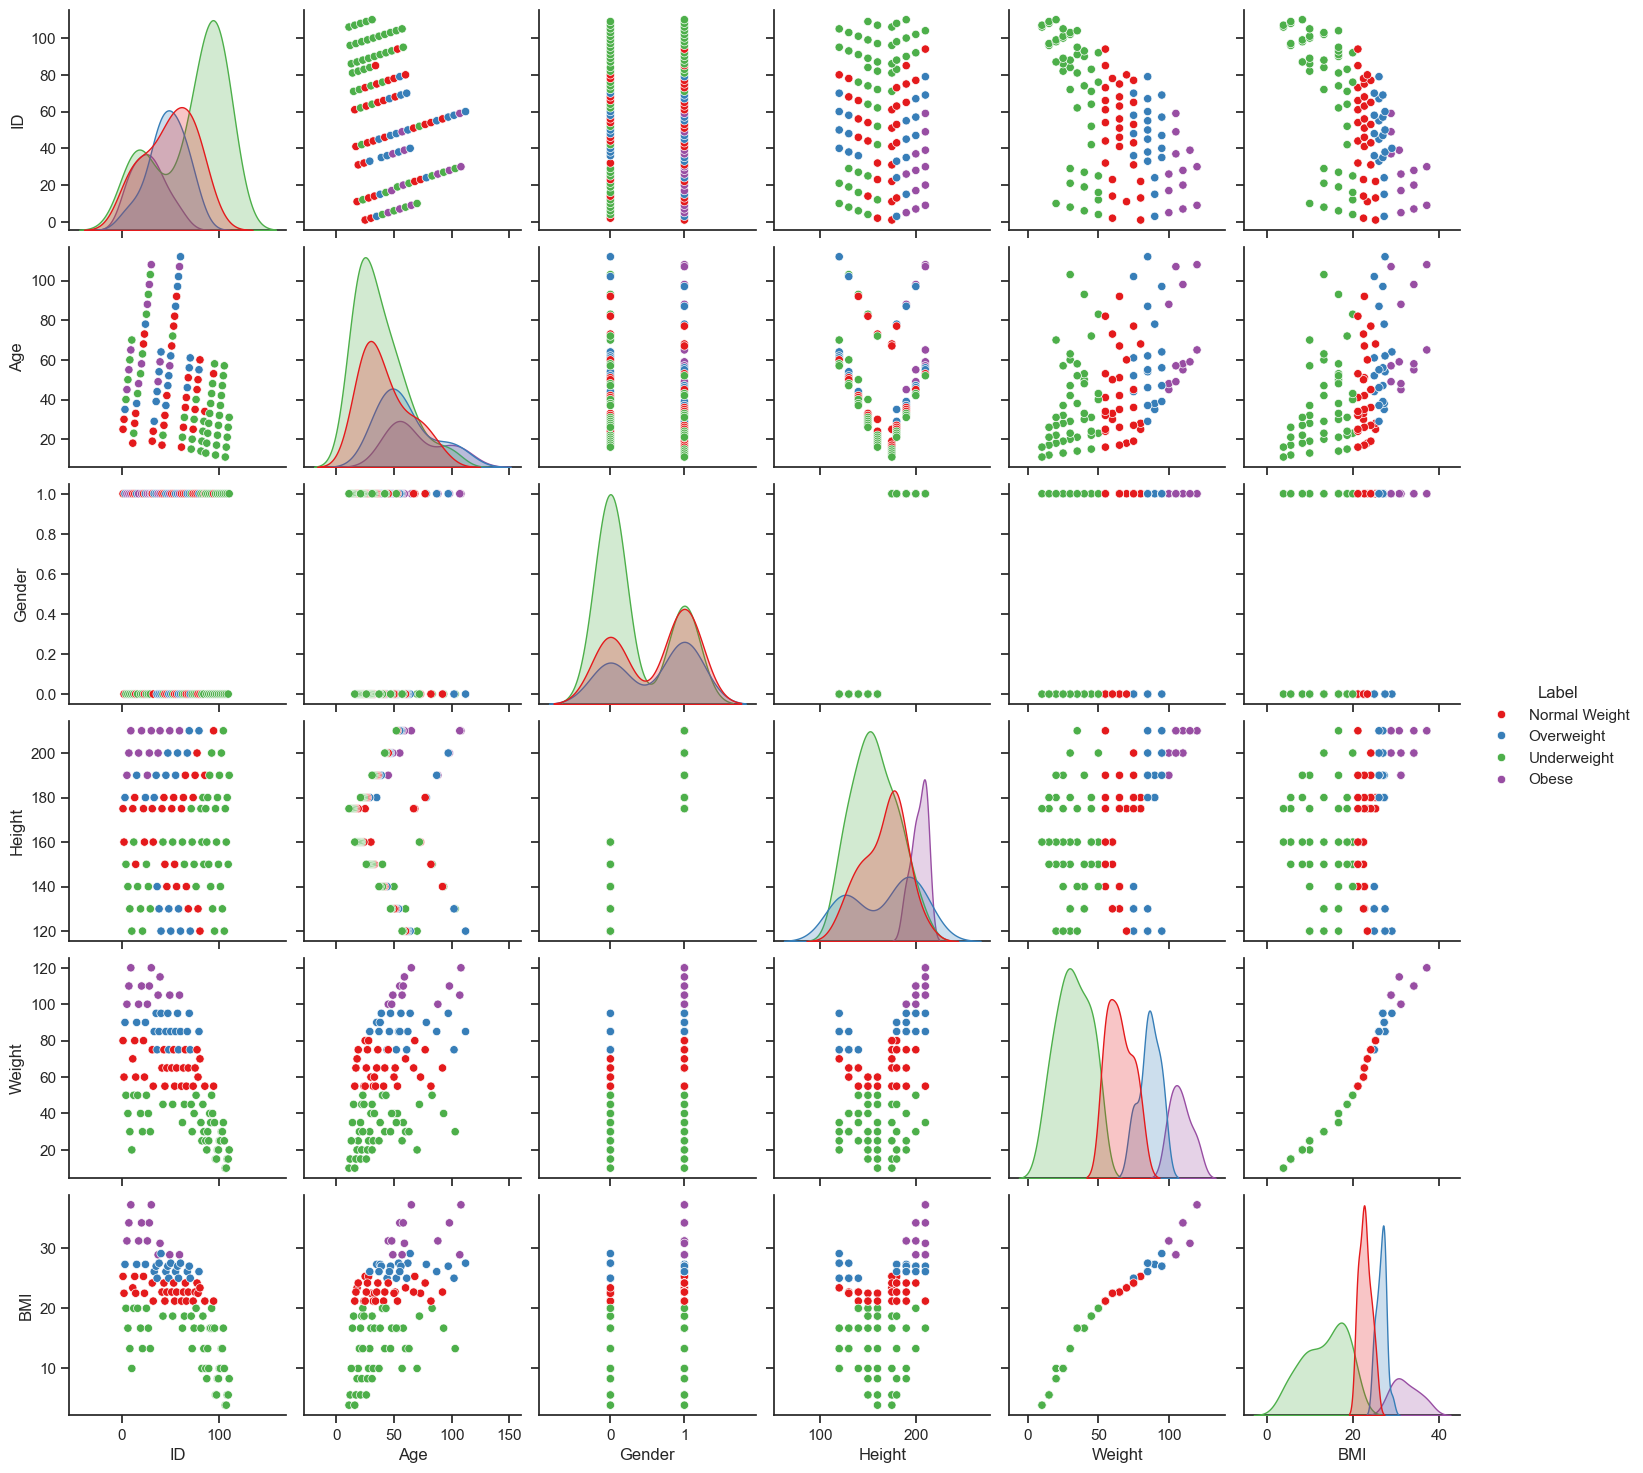

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gunakan seaborn untuk membuat plot sebarplot
sns.set(style="ticks")
sns.pairplot(df, hue='Label', palette='Set1')
plt.show()

## Data Test

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

Baris kode di atas mengimpor kelas KNeighborsClassifier dari modul neighbors dalam pustaka scikit-learn, dan kemudian membuat sebuah objek dari kelas tersebut dengan menggunakan konstruktor KNeighborsClassifier(n_neighbors=1).

Mari kita jelaskan baris kode tersebut:

1. from sklearn.neighbors import KNeighborsClassifier: Baris ini mengimpor kelas KNeighborsClassifier dari modul neighbors dalam pustaka scikit-learn. KNeighborsClassifier adalah sebuah model yang digunakan untuk klasifikasi berdasarkan pada metode K-Nearest Neighbors (KNN).

2. knn = KNeighborsClassifier(n_neighbors=1): Baris ini membuat sebuah objek dari kelas KNeighborsClassifier. Konstruktor dari kelas ini menerima beberapa parameter, salah satunya adalah n_neighbors, yang menentukan jumlah tetangga terdekat yang akan digunakan dalam proses klasifikasi. Dalam kasus ini, kita mengatur n_neighbors=1, yang berarti model akan menggunakan hanya satu tetangga terdekat untuk melakukan klasifikasi.

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Baris kode knn.fit(X_train, y_train) digunakan untuk melatih model K-Nearest Neighbors (KNN) menggunakan data pelatihan (X_train dan y_train).

Mari kita jelaskan lebih detail:

1. knn: Ini adalah objek dari kelas KNeighborsClassifier yang telah dibuat sebelumnya.

2. .fit(): Metode ini digunakan untuk melatih model. Dalam konteks KNN, proses pelatihan melibatkan mempelajari pola dari data pelatihan yang diberikan, sehingga model dapat melakukan prediksi dengan menggunakan informasi tersebut.

3. X_train: Parameter pertama yang diberikan kepada metode .fit() adalah data pelatihan untuk fitur (X_train), yang berisi fitur-fitur dari dataset yang akan digunakan untuk melatih model.

4. y_train: Parameter kedua yang diberikan adalah data pelatihan untuk label (y_train), yang berisi label-label yang sesuai dengan fitur-fitur dalam X_train. Ini digunakan untuk melatih model untuk melakukan klasifikasi dengan mempelajari hubungan antara fitur dan label.

Setelah baris kode ini dieksekusi, model KNN akan dilatih menggunakan data pelatihan yang disediakan, dan siap digunakan untuk melakukan prediksi pada data baru.

In [26]:
y_pred = knn.predict(X_test)
print(f"Test set score (mean) : {np.mean(y_pred == y_test):.0%}")
print(f"Test set score (score) : {knn.score(X_test, y_test):.0%}")

Test set score (mean) : 70%
Test set score (score) : 70%


Baris kode di atas digunakan untuk melakukan prediksi pada data uji (X_test) menggunakan model K-Nearest Neighbors (KNN) yang telah dilatih sebelumnya, dan kemudian mencetak skor akurasi dari prediksi tersebut. Mari kita jelaskan baris kode tersebut:

1. y_pred = knn.predict(X_test): Baris ini memprediksi label-label untuk data uji (X_test) menggunakan model KNN yang telah dilatih sebelumnya. Hasil prediksi disimpan dalam variabel y_pred.

2. print(f"Test set score (mean) : {np.mean(y_pred == y_test):.0%}"): Baris ini mencetak skor akurasi dari prediksi yang telah dilakukan. Skor akurasi dihitung dengan menghitung rata-rata kebenaran dari prediksi terhadap label yang sebenarnya pada data uji. Dalam hal ini, kita menggunakan ekspresi np.mean(y_pred == y_test) untuk menghitung persentase label yang diprediksi secara benar, dan kemudian menggunakan f-string (f'...') untuk mencetaknya dalam format persentase tanpa desimal.

3. print(f"Test set score (score) : {knn.score(X_test, y_test):.0%}"): Baris ini juga mencetak skor akurasi dari prediksi yang telah dilakukan, tetapi menggunakan metode score() dari objek knn. Metode score() ini menghitung akurasi dari prediksi terhadap label yang sebenarnya pada data uji. Seperti sebelumnya, kita menggunakan f-string untuk mencetaknya dalam format persentase tanpa desimal.

Hasil cetakan akan menampilkan skor akurasi dari prediksi model KNN terhadap data uji, baik dengan menggunakan cara langsung menghitung persentase kebenaran prediksi maupun dengan menggunakan metode score() dari objek knn.